## Importing data

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df=pd.read_csv("Telecom_churn.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [67]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

**Dataset contains no missing values**

## Data preparation

In [68]:
# Converting yes/no to 0/1:
df['international plan']=df['international plan'].apply(lambda x: 1 if x=='yes' else 0)
df['voice mail plan']=df['voice mail plan'].apply(lambda x: 1 if x=='yes' else 0)
df['churn']=df['churn'].apply(lambda x: 1 if x==True else 0)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [69]:
# Creating dummies for 'state' variable:
df=pd.merge(df,
            pd.get_dummies(df.state,drop_first=True),
            left_index=True,
            right_index=True,
            how='inner')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,0,0,0,0,0,0,0,0,0,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,0,0,0,0,0,0,0,0,0,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,0,0,0,0,0,0,0,0,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,0,0,0,0,0,0,0,0,0,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# Dropping not needed columns
df=df.drop(['state','account length','area code','phone number'],axis=1)
df.head()

,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,0
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,0,0,0


In [71]:
x=df.drop('churn',axis=1)
y=df['churn']

## Checking assumptions of logistic regression

1) The outcome is a binary or dichotomous

2) There is a linear relationship between the logit of the outcome and each predictor variables.

3) There is no influential values (extreme values or outliers) in the continuous predictors

4) There is no high intercorrelations (i.e. multicollinearity) among the predictors.

In [72]:
# Checking for multicollinearity
x.corr().stack()[(x.corr().stack()>0.5) & (x.corr().stack()<1)]

voice mail plan        number vmail messages    0.956927
number vmail messages  voice mail plan          0.956927
total day minutes      total day charge         1.000000
total day charge       total day minutes        1.000000
total eve minutes      total eve charge         1.000000
total eve charge       total eve minutes        1.000000
total night minutes    total night charge       0.999999
total night charge     total night minutes      0.999999
total intl minutes     total intl charge        0.999993
total intl charge      total intl minutes       0.999993
dtype: float64

In [73]:
# Dropping 1 variable in each highly correlated pair
x=x.drop(['number vmail messages','total day minutes','total eve minutes','total night minutes','total intl minutes'],axis=1)

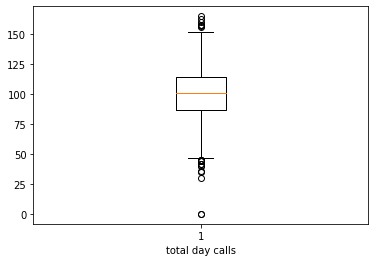

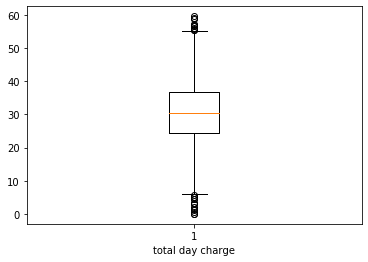

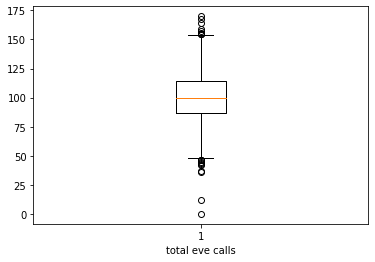

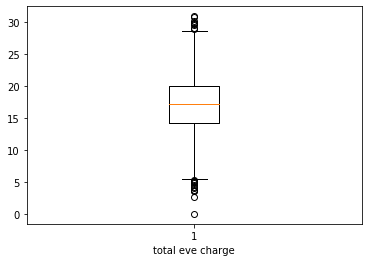

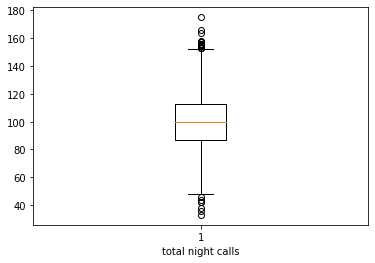

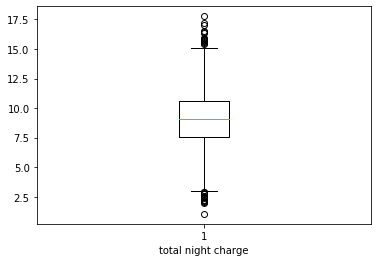

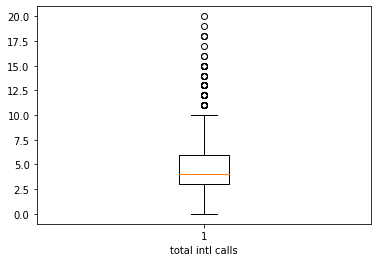

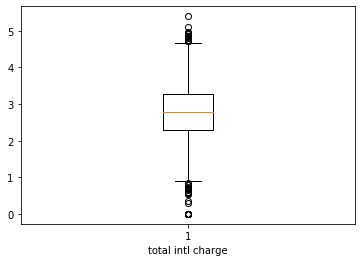

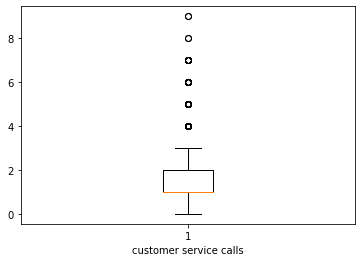

In [74]:
# Checking distribution of each continious variable:
for i in x.columns[2:11]:
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

**According to results all continious variables contain outliers, that's why they should be logarithmized to decrease outliers' influence on results:**

In [75]:
import math
for i in x.columns[2:11]:
    x[i]=x[i].apply(lambda x:math.log(x) if x>0 else 0)
x.head()

,international plan,voice mail plan,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,1,4.700480,3.808217,4.595120,2.820188,4.510860,2.398804,1.098612,0.993252,...,0,0,0,0,0,0,0,0,0,0
1,0,1,4.812184,3.313095,4.634729,2.810607,4.634729,2.437990,1.098612,1.308333,...,0,0,0,0,0,0,0,0,0,0
2,0,0,4.736198,3.722798,4.700480,2.332144,4.644391,1.990610,1.609438,1.190888,...,0,0,0,0,0,0,0,0,0,0
3,1,0,4.262680,3.929863,4.477337,1.660131,4.488636,2.181547,1.945910,0.576613,...,0,0,0,0,0,0,0,0,0,0
4,1,0,4.727388,3.344274,4.804021,2.534490,4.795791,2.129421,1.098612,1.004302,...,0,0,0,0,0,0,0,0,0,0


## Fitting logistic regression

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [124]:
# Randomly splitting dataset on train and test parts:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=None)

In [125]:
# Scaling data to unit variance
std=StandardScaler()
# Fitting and transforming x_train
x_train_scaled=std.fit_transform(x_train)
# Transforming x_test using already fitted StandardScaler
x_test_scaled=std.transform(x_test)

In [126]:
# Creating GridSearchCV instance to find best parameters using k-fold method
params={'C':[0.001,0.01,1,100,1000]}
gridCV=GridSearchCV(LogisticRegression(),params,cv=5)

In [127]:
gridCV.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 1, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [128]:
print("Best parameter: ",gridCV.best_params_)
print("Accuracy: ",gridCV.cv_results_['mean_test_score'][1])

Best parameter:  {'C': 0.01}
Accuracy:  0.8548334281959933


## Checking model on test dataset:

In [129]:
# Calculating predictions
predictions=gridCV.best_estimator_.predict(x_test_scaled)

In [130]:
from sklearn.metrics import precision_recall_fscore_support

In [131]:
print('Accuracy:', (predictions==y_test).mean())
print("Precision: ",precision_recall_fscore_support(y_test,predictions)[0][0])
print("Recall: ",precision_recall_fscore_support(y_test,predictions)[1][0])

Accuracy: 0.8785607196401799
Precision:  0.8861538461538462
Recall:  0.9879931389365352


Accuracy of the model is 85%, which is quite high and consistent with the accuracy obtained during training, so we can say that during training there weren't overfitting and underfitting. 

Precision is 86%, which means that out of all customers labeled as churn ones 86% of them really churned.

Recall is 98%, which shows that out of all customers that churned our model will detect 98% of them